## This notebook evalutes Gaussian mixture model
> Simple PCA is built and the model is fit over the 7 types of canopy covers.  

In [62]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries
import time
import pandas as pd
from pandas.plotting import scatter_matrix
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

# For producing decision tree diagrams.
from IPython.core.display import Image, display

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Set the randomizer seed so results are the same each time
np.random.seed(0)

%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

raw_data = pd.read_csv(r"../../data/covtype.csv") #https://www.kaggle.com/uciml/forest-cover-type-dataset
train_df = pd.read_csv(r"../../data/train.csv") #https://www.kaggle.com/c/forest-cover-type-prediction/data
test_df = pd.read_csv(r"../../data/test.csv") #https://www.kaggle.com/c/forest-cover-type-prediction/data

# Build Train and Test Datasets

In [63]:
test_labeled = raw_data[15120:]

test_labeled

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15120,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,1
15121,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,1
15122,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,1
15123,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,1
15124,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [64]:
# show that this matches the above
test_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,581008,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,0
565888,581009,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,0
565889,581010,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,0
565890,581011,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# create correct labels df with index
test_labels_correct = pd.DataFrame(data = test_labeled, 
                                   index = test_df.loc[:, "Id"],
                                  columns = ["Cover_Type"])

# overwrite last value from NaN to correct label
test_labels_correct.loc[581012, "Cover_Type"] = 3

# cast back to int
test_labels_correct = test_labels_correct.astype("int32")

test_labels_correct

,Cover_Type
Id,
15121,1
15122,1
15123,1
15124,1
15125,1
...,...
581008,3
581009,3
581010,3


In [66]:
# extract labels from training data
train_labels_df = train_df.loc[:, "Cover_Type"]

# extract training data except labels and ID column
train_df = train_df.loc[:, (train_df.columns != "Cover_Type") & 
                        (train_df.columns != "Id")]

train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# extract indices of testing data for scoring
test_index_df = test_df.loc[:, "Id"]

# extract test data except ID column
test_df = test_df.loc[:, test_df.columns != "Id"]

test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


## PCA to take a look at what we have

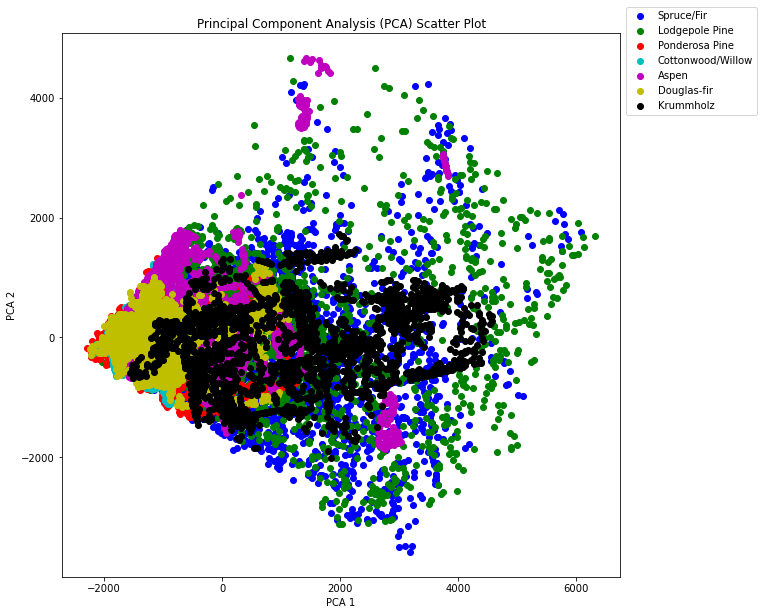

In [69]:
# Spruce/Fir
# Lodgepole Pine
# Ponderosa Pine
# Cottonwood/Willow
# Aspen
# Douglas-fir
# Krummholz

# Build PCA
pca_mod = PCA(n_components = 2).fit(train_df)
train_pca = pca_mod.transform(train_df)

# Build Canopy Map 
spruce = np.where(train_labels_df == 1, True, False)
lodgepole = np.where(train_labels_df == 2, True, False)
ponderosa = np.where(train_labels_df == 3, True, False)
willow = np.where(train_labels_df == 4, True, False)
aspen = np.where(train_labels_df == 5, True, False)
fir = np.where(train_labels_df == 6, True, False)
krummholz = np.where(train_labels_df == 7, True, False)
    
# Plot as square scatter plot w/ same x/y axis        
fig = plt.figure(figsize=(10, 10))

plt.scatter(train_pca[:,0][spruce], train_pca[:,1][spruce], c = 'b')
plt.scatter(train_pca[:,0][lodgepole], train_pca[:,1][lodgepole], c = 'g')
plt.scatter(train_pca[:,0][ponderosa], train_pca[:,1][ponderosa], c = 'r')
plt.scatter(train_pca[:,0][willow], train_pca[:,1][willow], c = 'c')
plt.scatter(train_pca[:,0][aspen], train_pca[:,1][aspen], c = 'm')
plt.scatter(train_pca[:,0][fir], train_pca[:,1][fir], c = 'y')
plt.scatter(train_pca[:,0][krummholz], train_pca[:,1][krummholz], c = 'k')
plt.legend(["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
            "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"], loc=[1.01, .85]) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Principal Component Analysis (PCA) Scatter Plot')
plt.show() 

# Build a 3D Plot just to see

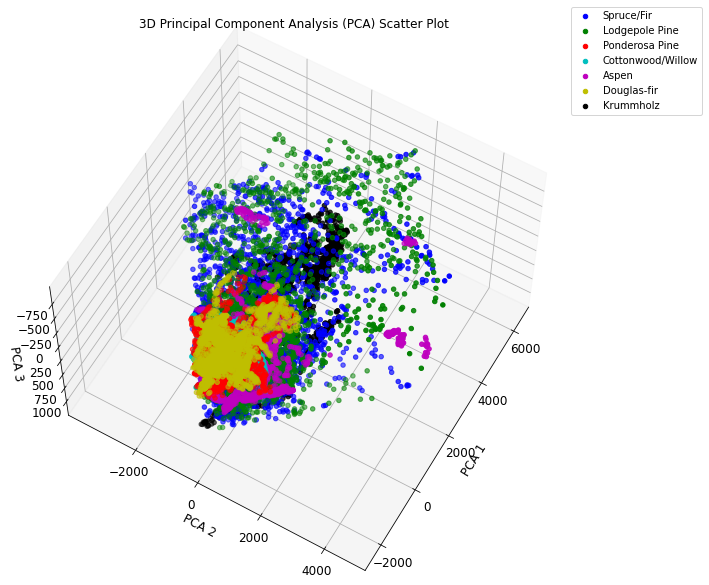

In [93]:
# Spruce/Fir
# Lodgepole Pine
# Ponderosa Pine
# Cottonwood/Willow
# Aspen
# Douglas-fir
# Krummholz

# Build PCA
pca_mod = PCA(n_components = 3).fit(train_df)
train_pca = pca_mod.transform(train_df)

# Build Canopy Map 
spruce = np.where(train_labels_df == 1, True, False)
lodgepole = np.where(train_labels_df == 2, True, False)
ponderosa = np.where(train_labels_df == 3, True, False)
willow = np.where(train_labels_df == 4, True, False)
aspen = np.where(train_labels_df == 5, True, False)
fir = np.where(train_labels_df == 6, True, False)
krummholz = np.where(train_labels_df == 7, True, False)
    
# Plot as square scatter plot w/ same x/y axis        
fig = plt.figure(figsize=(10, 10))

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.scatter(train_pca[:,0][spruce], train_pca[:,1][spruce], train_pca[:,2][spruce], c = 'b')
ax.scatter(train_pca[:,0][lodgepole], train_pca[:,1][lodgepole], train_pca[:,2][lodgepole], c = 'g')
ax.scatter(train_pca[:,0][ponderosa], train_pca[:,1][ponderosa], train_pca[:,2][ponderosa], c = 'r')
ax.scatter(train_pca[:,0][willow], train_pca[:,1][willow], train_pca[:,2][willow], c = 'c')
ax.scatter(train_pca[:,0][aspen], train_pca[:,1][aspen], train_pca[:,2][aspen], c = 'm')
ax.scatter(train_pca[:,0][fir], train_pca[:,1][fir], train_pca[:,2][fir], c = 'y')
ax.scatter(train_pca[:,0][krummholz], train_pca[:,1][krummholz], train_pca[:,2][krummholz], c = 'k')
plt.legend(["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
            "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"], loc=[1.01, .85]) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# plt.zlabel('PCA 3')
ax.set_zlabel('PCA 3')

plt.title('3D Principal Component Analysis (PCA) Scatter Plot')

# Rotate Plot for desired angle
ax.view_init(-120, -30)
plt.show() 

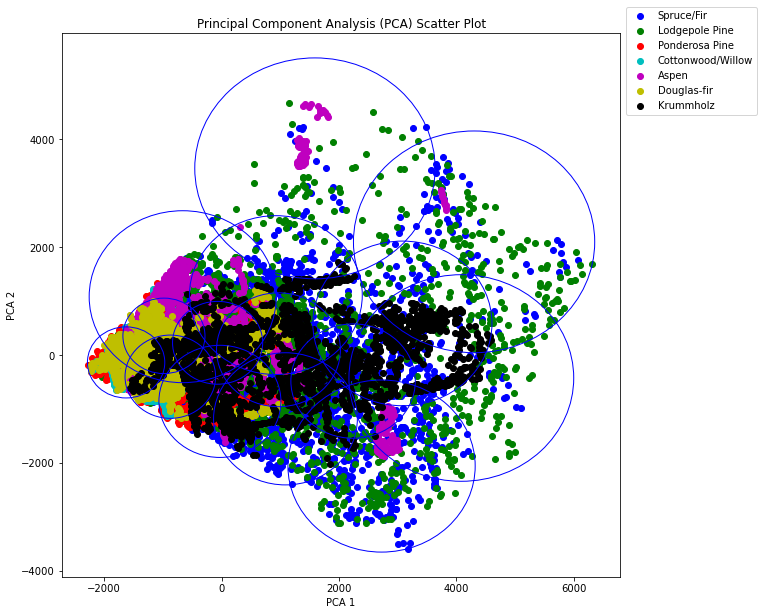

In [79]:
# Build PCA
pca_mod = PCA(n_components = 2).fit(train_df)
train_pca = pca_mod.transform(train_df)

# Build Canopy Map 
spruce = np.where(train_labels_df == 1, True, False)
lodgepole = np.where(train_labels_df == 2, True, False)
ponderosa = np.where(train_labels_df == 3, True, False)
willow = np.where(train_labels_df == 4, True, False)
aspen = np.where(train_labels_df == 5, True, False)
fir = np.where(train_labels_df == 6, True, False)
krummholz = np.where(train_labels_df == 7, True, False)

# Get PCA transform to feed into K-mean Cluster
scores_pca = np.array(list(zip(train_pca[:,0], 
             train_pca[:,1]))).reshape(len(train_pca[:,0]), 2)
   
# Get k-means for the 6 clusters
k = 15
km = KMeans(n_clusters=k, init='k-means++')
clstrs7 = km.fit(scores_pca)
centers = np.array(clstrs7.cluster_centers_)
labels = np.array(clstrs7.labels_)
radius = [0]*k 
    
# Plot as square scatter plot w/ same x/y axis        
fig, axes = plt.figure(figsize=(10, 10)), plt.gca()

plt.scatter(train_pca[:,0][spruce], train_pca[:,1][spruce], c = 'b')
plt.scatter(train_pca[:,0][lodgepole], train_pca[:,1][lodgepole], c = 'g')
plt.scatter(train_pca[:,0][ponderosa], train_pca[:,1][ponderosa], c = 'r')
plt.scatter(train_pca[:,0][willow], train_pca[:,1][willow], c = 'c')
plt.scatter(train_pca[:,0][aspen], train_pca[:,1][aspen], c = 'm')
plt.scatter(train_pca[:,0][fir], train_pca[:,1][fir], c = 'y')
plt.scatter(train_pca[:,0][krummholz], train_pca[:,1][krummholz], c = 'k')
plt.legend(["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
            "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"], loc=[1.01, .85]) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Principal Component Analysis (PCA) Scatter Plot')

# Plot a circle that goes through the cluster's example that is most distant from the centroid
# Loop through all clusters 
for i in range(k):
    # Build mask with points for this centroid
    mask = np.where(labels == i, True, False)
    # Only include points for this centriod
    points_i = scores_pca[np.array(mask)]
        
    # Get furtherest distance from centroid for radius of circle
    for x, point in enumerate(points_i):
        # calculating Euclidean distance using linalg.norm() 
        dist = np.linalg.norm(centers[i] - point)      
        if dist > radius[i]:
            radius[i] = dist
                
    # Add Circle to Plot
    circle = plt.Circle((centers[i,0], centers[i,1]),radius=radius[i], ec='b', lw=1, fill=False)
    axes.add_patch(circle)

plt.show() 

# Base Model

In [85]:
# Build PCA

#------------------------------------------------------------------------------------
# Build PCA on train data
pca_mod = PCA(n_components = 2).fit(train_df)
train_pca = pca_mod.transform(train_df)

# Build Canopy Map 
spruce = np.where(train_labels_df == 1, True, False)
lodgepole = np.where(train_labels_df == 2, True, False)
ponderosa = np.where(train_labels_df == 3, True, False)
willow = np.where(train_labels_df == 4, True, False)
aspen = np.where(train_labels_df == 5, True, False)
fir = np.where(train_labels_df == 6, True, False)
krummholz = np.where(train_labels_df == 7, True, False)

# Split to canopy arrary
spruce_pca = train_pca[spruce]
lodgepole_pca = train_pca[lodgepole]
ponderosa_pca = train_pca[ponderosa]
willow_pca = train_pca[willow]
aspen_pca = train_pca[aspen]
fir_pca = train_pca[fir]
krummholz_pca = train_pca[krummholz]

#------------------------------------------------------------------------------------
# fit a Gaussian Mixture Model on canopy arrays
spruce_clf = GaussianMixture(n_components=5, covariance_type='full', random_state=12345)
spruce_clf.fit(spruce_pca)

lodgepole_clf = GaussianMixture(n_components=5, covariance_type='full', random_state=12345)
lodgepole_clf.fit(lodgepole_pca)

ponderosa_clf = GaussianMixture(n_components=5, covariance_type='full', random_state=12345)
ponderosa_clf.fit(ponderosa_pca)

willow_clf = GaussianMixture(n_components=5, covariance_type='full', random_state=12345)
willow_clf.fit(willow_pca)

aspen_clf = GaussianMixture(n_components=5, covariance_type='full', random_state=12345)
aspen_clf.fit(aspen_pca)

fir_clf = GaussianMixture(n_components=5, covariance_type='full', random_state=12345)
fir_clf.fit(fir_pca)

krummholz_clf = GaussianMixture(n_components=5, covariance_type='full', random_state=12345)
krummholz_clf.fit(krummholz_pca)

    
#------------------------------------------------------------------------------------
# Transform test_data on train data pca
test_pca = pca_mod.transform(test_df)
    
#Score the samples
spruce_test = spruce_clf.score_samples(test_pca)
lodgepole_test = lodgepole_clf.score_samples(test_pca)
ponderosa_test = ponderosa_clf.score_samples(test_pca)
willow_test = willow_clf.score_samples(test_pca)
aspen_test = aspen_clf.score_samples(test_pca)
fir_test = fir_clf.score_samples(test_pca)
krummholz_test = krummholz_clf.score_samples(test_pca)

GMM_pred_canopy = []

GMM_pred_canopy = np.asarray(GMM_pred_canopy)

for i, value in enumerate(spruce_test):
#     print(i)
#     GMM_pred_canopy[i] = 1 # Default spruce
    GMM_pred_canopy = np.append(GMM_pred_canopy, [1])
    max_test = value
    if lodgepole_test[i] > max_test:
        max_test = lodgepole_test[i]
        GMM_pred_canopy[i] = 2
    if ponderosa_test[i] > max_test:
        max_test = ponderosa_test[i]
        GMM_pred_canopy[i] = 3
    if willow_test[i] > max_test:
        max_test = willow_test[i]
        GMM_pred_canopy[i] = 4
    if aspen_test[i] > max_test:
        max_test = aspen_test[i]
        GMM_pred_canopy[i] = 5
    if fir_test[i] > max_test:
        max_test = fir_test[i]
        GMM_pred_canopy[i] = 6
    if krummholz_test[i] > max_test:
        max_test = krummholz_test[i]
        GMM_pred_canopy[i] = 7


Accuracy Score is: 26.6070


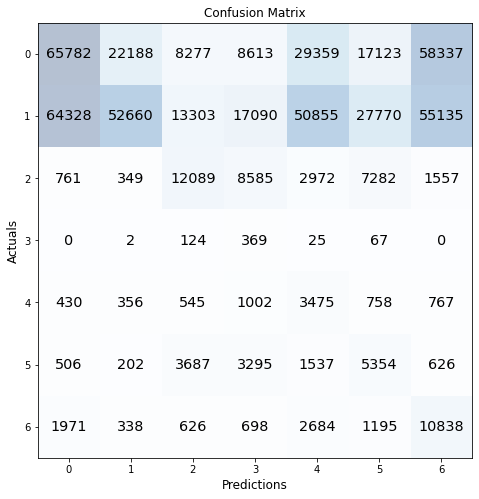

In [86]:
    
# Get accuracy and print
accuracy = metrics.accuracy_score(test_labels_correct, GMM_pred_canopy)
print('Accuracy Score is: %.4f'%(accuracy*100))    

        
# Plot Confusion matrix and find top misclassifications
cm = metrics.confusion_matrix(test_labels_correct, GMM_pred_canopy)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
plt.tick_params(axis='both', which='major', labelsize=10, 
                labelbottom = True, bottom=True, top = False, labeltop=False)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

# Increase PCA to max and number of componets in GMM

In [94]:
# Build PCA

#------------------------------------------------------------------------------------
# Build PCA on train data
pca_mod = PCA(n_components = 54).fit(train_df)
train_pca = pca_mod.transform(train_df)

# Build Canopy Map 
spruce = np.where(train_labels_df == 1, True, False)
lodgepole = np.where(train_labels_df == 2, True, False)
ponderosa = np.where(train_labels_df == 3, True, False)
willow = np.where(train_labels_df == 4, True, False)
aspen = np.where(train_labels_df == 5, True, False)
fir = np.where(train_labels_df == 6, True, False)
krummholz = np.where(train_labels_df == 7, True, False)

# Split to canopy arrary
spruce_pca = train_pca[spruce]
lodgepole_pca = train_pca[lodgepole]
ponderosa_pca = train_pca[ponderosa]
willow_pca = train_pca[willow]
aspen_pca = train_pca[aspen]
fir_pca = train_pca[fir]
krummholz_pca = train_pca[krummholz]

#------------------------------------------------------------------------------------
# fit a Gaussian Mixture Model on canopy arrays
spruce_clf = GaussianMixture(n_components=100, covariance_type='full', random_state=12345)
spruce_clf.fit(spruce_pca)

lodgepole_clf = GaussianMixture(n_components=100, covariance_type='full', random_state=12345)
lodgepole_clf.fit(lodgepole_pca)

ponderosa_clf = GaussianMixture(n_components=100, covariance_type='full', random_state=12345)
ponderosa_clf.fit(ponderosa_pca)

willow_clf = GaussianMixture(n_components=100, covariance_type='full', random_state=12345)
willow_clf.fit(willow_pca)

aspen_clf = GaussianMixture(n_components=100, covariance_type='full', random_state=12345)
aspen_clf.fit(aspen_pca)

fir_clf = GaussianMixture(n_components=100, covariance_type='full', random_state=12345)
fir_clf.fit(fir_pca)

krummholz_clf = GaussianMixture(n_components=100, covariance_type='full', random_state=12345)
krummholz_clf.fit(krummholz_pca)

    
#------------------------------------------------------------------------------------
# Transform test_data on train data pca
test_pca = pca_mod.transform(test_df)
    
#Score the samples
spruce_test = spruce_clf.score_samples(test_pca)
lodgepole_test = lodgepole_clf.score_samples(test_pca)
ponderosa_test = ponderosa_clf.score_samples(test_pca)
willow_test = willow_clf.score_samples(test_pca)
aspen_test = aspen_clf.score_samples(test_pca)
fir_test = fir_clf.score_samples(test_pca)
krummholz_test = krummholz_clf.score_samples(test_pca)

GMM_pred_canopy = []

GMM_pred_canopy = np.asarray(GMM_pred_canopy)

for i, value in enumerate(spruce_test):
#     print(i)
#     GMM_pred_canopy[i] = 1 # Default spruce
    GMM_pred_canopy = np.append(GMM_pred_canopy, [1])
    max_test = value
    if lodgepole_test[i] > max_test:
        max_test = lodgepole_test[i]
        GMM_pred_canopy[i] = 2
    if ponderosa_test[i] > max_test:
        max_test = ponderosa_test[i]
        GMM_pred_canopy[i] = 3
    if willow_test[i] > max_test:
        max_test = willow_test[i]
        GMM_pred_canopy[i] = 4
    if aspen_test[i] > max_test:
        max_test = aspen_test[i]
        GMM_pred_canopy[i] = 5
    if fir_test[i] > max_test:
        max_test = fir_test[i]
        GMM_pred_canopy[i] = 6
    if krummholz_test[i] > max_test:
        max_test = krummholz_test[i]
        GMM_pred_canopy[i] = 7


Accuracy Score is: 67.0024


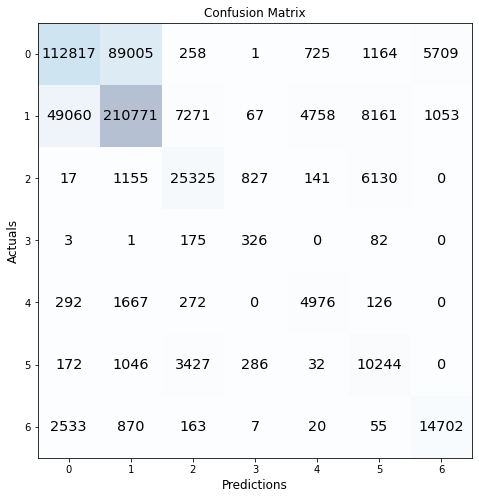

In [95]:
    
# Get accuracy and print
accuracy = metrics.accuracy_score(test_labels_correct, GMM_pred_canopy)
print('Accuracy Score is: %.4f'%(accuracy*100))    

        
# Plot Confusion matrix and find top misclassifications
cm = metrics.confusion_matrix(test_labels_correct, GMM_pred_canopy)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
plt.tick_params(axis='both', which='major', labelsize=10, 
                labelbottom = True, bottom=True, top = False, labeltop=False)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()